In [436]:
import numpy as np
import matplotlib.pyplot as plt
import mod_models as mm
import mod_evolution as me
import mod_visualization as mv
import mod_stimulation as ms
from mod_models import logger
import inputools.Trajectory as it
from tqdm import tqdm
from tools.utils import clf

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Settings

In [437]:
N = 4
Nj = 9

## Inputs

In [12]:
layer = it.InputLayer(N=9, kind='hd', sigma=0.01)
logger.info(layer)

2023-11-29 19:21:58 | InputLayer(N=9, kind=hd, sigma=0.01)


2023-11-30 03:00:53 | Layer(N=9, kind=hd)


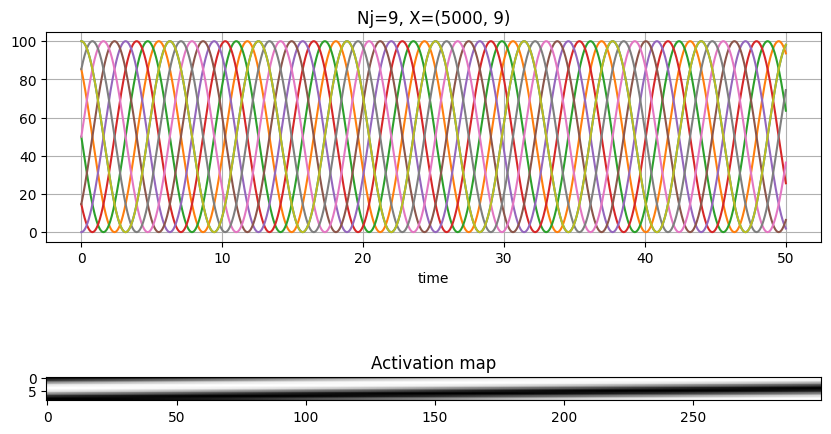

In [609]:
layer = it.HDLayer(N=Nj, sigma=0.01)
logger.info(layer)

Z = np.arange(0, 50, 0.01).reshape(-1, 1)
X = layer.parse_trajectory(Z)

def plot_x(X: np.ndarray): 
    
    plt.figure(figsize=(10, 6))
    
    plt.subplot(211)
    for x in X.T:
        plt.plot(Z, x)
    plt.grid()
    plt.title(f"{Nj=}, X={X.shape}") 
    plt.xlabel("time")
    
    plt.subplot(212)
    plt.title("Activation map")
    plt.imshow(X[:300].T, cmap="Greys")
    plt.show()

plot_x(X=X)

In [605]:
layer = it.PlaceLayer(N=Nj, sigma=0.01)
logger.info(layer)

2023-11-30 03:00:04 | Layer(N=9, kind=place)


2023-11-30 03:00:25 | Layer(N=9, kind=place)


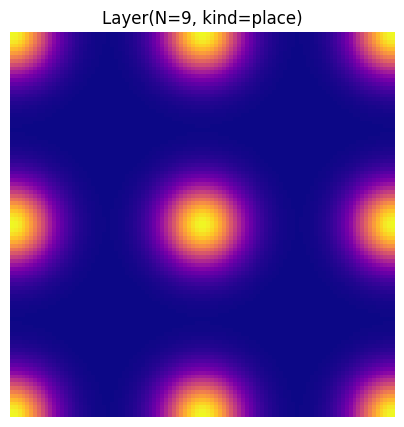

In [608]:
layer = it.PlaceLayer(N=Nj, sigma=0.01)
logger.info(layer)

# Generate a grid of points
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)

# Compute the activation at each point, passing phi_x and phi_y separately
activation = layer.step_vect(X, Y)

# Plot the combined activations of all neurons
plt.figure(figsize=(5, 5))

plt.imshow(activation.sum(axis=0).reshape(100, 100), cmap='plasma')

# Add labels and title
plt.title(f"{layer}")
plt.axis('off')
plt.grid()
plt.show()

In [662]:
func = lambda x: 1 / (1 + np.exp(-4*(x + 0.3)))
dunc = lambda x: (x - x.min()) / (x.max() - x.min())

dfunc = lambda x: func(dunc(x))

2023-11-30 03:34:36 | Layer(N=4, kind=grid)


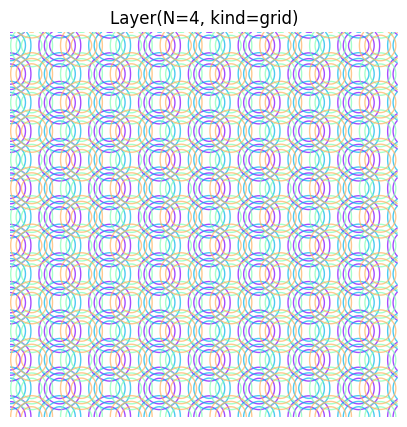

In [857]:
Nj = 4

func = lambda x: 1 / (1 + np.exp(-5*(x - 0.4)))
dunc = lambda x: (x - x.min()) / (x.max() - x.min())

dfunc = lambda x: func(dunc(x))

layer = it.GridLayer(N=Nj, sigma=11., 
                     scale=np.array([1.47, 0.52]))
logger.info(layer)

# Generate a grid of points
x = np.linspace(0, 1, 200)
y = np.linspace(0, 1, 200)
X, Y = np.meshgrid(x, y)

# Compute the activation at each point, passing phi_x and phi_y separately
activation = layer.step_vect(X, Y)

# Plot the combined activations of all neurons
plt.figure(figsize=(5, 5))

# plot contour or imshow
if 1:
    # Generate a list of colormaps, one for each neuron
    cmaps = [plt.cm.rainbow(i/Nj) for i in range(n)]
    
    # Loop through each neuron and plot its activation
    for i in range(n):
        # Reshape the activation of the ith neuron to match X and Y's shape
        Z = activation[i].reshape(X.shape)
    
        # Plot the contour for each neuron
        plt.contour(X, Y, Z, levels=3, colors=[cmaps[i]], alpha=0.7, linewidths=1.)
else:
    #plt.imshow(activation.sum(axis=0).reshape(100, 100), cmap='plasma')
    plt.imshow(dfunc(activation.sum(axis=0)).reshape(len(x), 
                                                     len(y)), 
               cmap='plasma')

# Add labels and title
plt.title(f"{layer}")
plt.axis('off')
plt.grid()
plt.show()

In [734]:
print(dfunc(activation).max(), dfunc(activation).min())

print(dfunc(activation)[0])

0.5 0.2689414213699951
[0.5        0.4990874  0.49636464 ... 0.39106459 0.37742182 0.36406992]


In [5]:
model = mm.RateNetwork3(N=N, Nj=Nj, 
                       gain=4,
                       bias=2,
                       lr=1,
                       lr_beta=1.,
                       rule='hebb',
                       wff_std=0.01,
                       wff_min=0.01,
                       wff_max=3.,
                       wff_const=7,
                       wff_tau=10,
                       loc_magnitude=2)
logger.info(model)

2023-11-29 18:18:10 | RateNetwork3(N=4, Nj=6, rule=hebb) [oyfjj]


###### Load model from evolution

In [3]:
genome = me.load_best_individual()
genome

2023-11-24 15:02:47 | Available files in /Users/daniekru/Research/lab/PCNN/cache:
2023-11-24 15:02:47 | 0: best_2239_r3.json
2023-11-24 15:02:47 | 1: best_2220_r3.json
2023-11-24 15:02:47 | 2: best_2311_1657_r3.json
2023-11-24 15:02:47 | 3: best_2238_r3.json
2023-11-24 15:02:47 | 4: best_2233_r3.json
2023-11-24 15:02:47 | 5: best_2215_r3.json
2023-11-24 15:02:47 | 6: best_ind_2238.json
2023-11-24 15:02:47 | 7: best_2342_r3.json
2023-11-24 15:02:47 | 8: best_ind_2311.json
2023-11-24 15:02:47 | 9: top_ij_1.json
2023-11-24 15:02:47 | 10: best_2227_r3.json
2023-11-24 15:02:47 | 11: best_2218_r3.json
2023-11-24 15:02:47 | 12: best_2149_r3.json
2023-11-24 15:02:47 | 13: best_2226_r3.json
2023-11-24 15:02:47 | 14: best_2132_r3.json
2023-11-24 15:02:47 | 15: best_2311_1731_r3.json
2023-11-24 15:02:47 | 16: best_2411_1502_r3.json
2023-11-24 15:02:47 | 17: best_2129_r3.json
2023-11-24 15:02:47 | 18: best_2224_r3.json
2023-11-24 15:02:47 | 19: best_2213_r3.json


Choose a file:  16


2023-11-24 15:02:59 | Best individual loaded from best_2411_1502_r3.json in /Users/daniekru/Research/lab/PCNN/cache.


{'gain': 15.8,
 'bias': 1.0,
 'lr': 0.65999,
 'tau': 50.0,
 'wff_std': 0.001,
 'wff_min': 0.0,
 'wff_max': 3.0,
 'wff_tau': 132,
 'rule': 'hebb',
 'std_tuning': 0.001,
 'soft_beta': 0.1,
 'dt': 0.053,
 'N': 6,
 'Nj': 6}

In [4]:
model = mm.RateNetwork2(**genome)
logger.info(model)

2023-11-24 15:03:30 | RateNetwork2(N=6, Nj=6, rule=hebb)


## Simulation

KeyboardInterrupt: 

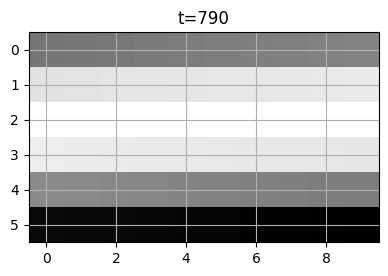

In [7]:
model.reset()


record = np.zeros((4, len(X)))
X2 = np.zeros((len(X) + 10, Nj))

for t, x in enumerate(X):
    
    model.step(x=x.reshape(-1, 1))
    record[0, t] = (model.Wff @ x.reshape(-1, 1))[0]
    record[1, t] = (model.Wff @ x.reshape(-1, 1))[1]
    record[2, t] = model.u[0]
    record[3, t] = model.u[1]
    X2[10:t+10] = X[:t]


    if t % 10 == 0:
        
        clf()
        plt.figure(figsize=(15, 6))
        plt.tight_layout()
        
        plt.subplot(221)
        plt.imshow(X2.T[:, t-10:t], cmap="Greys")
        #plt.ylim((0, 1))
        plt.title(f"{t=}")
        #plt.xlabel("time")
        plt.grid()
        
        plt.subplot(222)
        plt.axvline(0, color='black', alpha=0.3)
        plt.plot(np.flip(model.Wff[0], axis=0), range(Nj), '-b', alpha=0.4)
        plt.plot(np.flip(model.Wff[0], axis=0), range(Nj), 'ob', alpha=0.4)
        plt.plot(np.flip(model.Wff[1], axis=0), range(Nj), '-r', alpha=0.4)
        plt.plot(np.flip(model.Wff[1], axis=0), range(Nj), 'or', alpha=0.4)
        plt.title(f"Weights")
        plt.yticks(())
        plt.xlim((-5, 7))
        #plt.xlabel("intensity")
        plt.grid()
        
        plt.subplot(223)
        #plt.plot(range(t), record[0, :t])
        #plt.plot(range(t), record[1, :t])
        plt.imshow(model.Wff, cmap="plasma")
        plt.title("Input $W^{ff}$@$x$ : "+f"{record[0, t]:.3f}, {record[1, t]:.3f}")
        #plt.ylim((0, 20))
        plt.grid()
        
        plt.subplot(224)
        plt.plot(range(t), record[2, :t])
        plt.plot(range(t), record[3, :t])
        plt.title(f"$u$={np.around(model.u.T, 3)} - I={model.I_loc.T}")
        plt.ylim((0, 1.3))
        plt.grid()
        plt.pause(0.001)

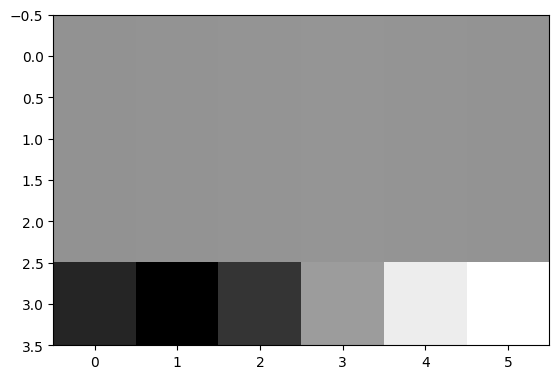

In [151]:
plt.imshow(model.Wff, cmap="Greys");

In [47]:
w = model.Wff
w

array([[0.05315329, 0.04514738, 0.03239973, 0.00884768, 0.01254714,
        0.01685206],
       [0.00659101, 0.00540898, 0.00144747, 0.00597474, 0.00416458,
        0.00205326]])

In [49]:
 w.max(axis=1) 

array([0.05315329, 0.00659101])

### Local stimulation

#### Supra-threshold

In [251]:
N = 5
T = 100

x = np.arange(N)
y = np.zeros((T, N))
for t in range(T):
    y[t, np.random.randint(0, N)] = 1

#### Sub-threshold

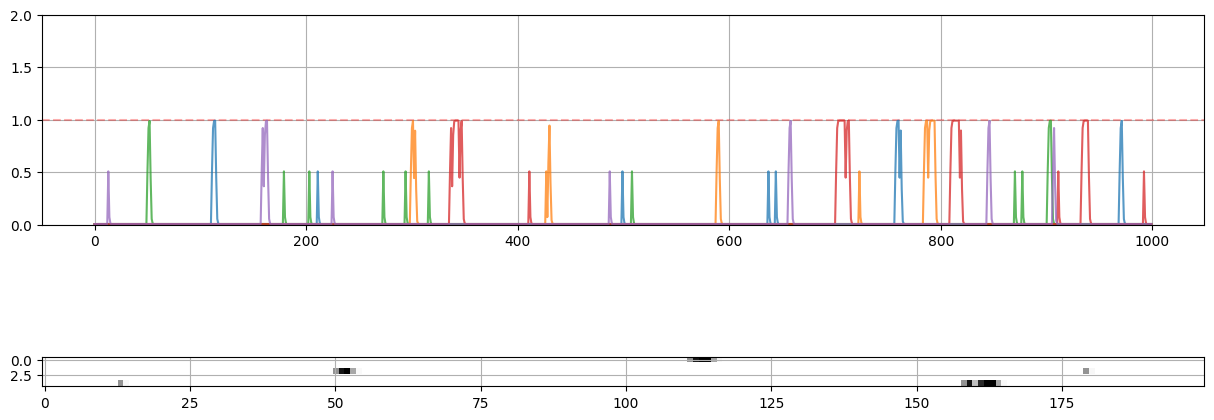

In [1057]:
def subthr(plot=True, noise=True):
    
    T = 1000
    N = 5
    thr = 1.
    u = np.ones((N, 1))*1e-8
    tau_0 = 30.
    tau = tau_0
    curr = np.zeros((N+1, 1))
    
    record = np.zeros((T, N))
    for t in range(T):
    
        p = np.array((u).flatten().tolist() + [1])
        p = p/p.sum()
        curr *= 0
        curr[np.random.choice(range(N+1), p=p, size=1)] = 1.
        u += (-u)/tau + int(noise)*np.random.normal(0., 0.1, (N, 1)) + curr[:-1]
    
        # activation
        u = 1 / (1 + np.exp(-5*(u - thr)))
    
        # adaptive threshold
        #tau += (1*u + tau_0*(1-u) - tau) / 2
        
        # record
        record[t, :] = u.flatten()
    
    if plot:
        plt.figure(figsize=(15, 6))
        plt.subplot(211)
        plt.axhline(thr, linestyle='--', color='red', alpha=0.3)
        for i in range(N):
            plt.plot(range(T), record[:, i], alpha=0.75)
        
        plt.grid()
        plt.ylim((0, 2))

        plt.subplot(212)
        plt.imshow(record[:200].T, cmap='Greys')
        plt.grid()
        plt.show()

    return record

record = subthr(plot=True, noise=0)

**Analysis**

In [1058]:
nb = 100
sum1 = np.zeros((nb, 2))
for i in tqdm(range(nb)):
    rec = subthr(plot=False)
    rec = np.where(rec > 0.4, 1, 0)
    sum1[i] = [rec.sum(axis=1).mean(), 
               (np.exp(rec.sum(axis=0))/np.exp(rec.sum(axis=0)).sum()).std()]

print("With noise")
print(f"mean (over T): {sum1.mean(axis=0)[0]:.3f}")
print(f"std (over N): {sum1.mean(axis=0)[1]:.3f}")

100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 46.88it/s]

With noise
mean (over T): 0.075
std (over N): 0.367


In [1059]:
nb = 100
sum1 = np.zeros((nb, 2))
for i in tqdm(range(nb)):
    rec = subthr(plot=False, noise=False)
    rec = np.where(rec > 0.4, 1, 0)
    sum1[i] = [rec.sum(axis=1).mean(), 
               (np.exp(rec.sum(axis=0))/np.exp(rec.sum(axis=0)).sum()).std()]

print("Without noise")
print(f"mean (over T): {sum1.mean(axis=0)[0]:.3f}")
print(f"std (over N): {sum1.mean(axis=0)[1]:.3f}")

100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 46.97it/s]

Without noise
mean (over T): 0.070
std (over N): 0.364


In [724]:
sums = []
for i in range(N):
    sums += [np.where(record[:, i] > 0.99, 1, 0).sum()]
print('no noise ', sums, sum(sums))

no noise  [0, 0, 9, 7, 10] 26


In [735]:
sums = []
for i in range(N):
    sums += [np.where(record[:, i] > 0.99, 1, 0).sum()]
print('noise ', sums, sum(sums))

noise  [3, 9, 1, 0, 5] 18


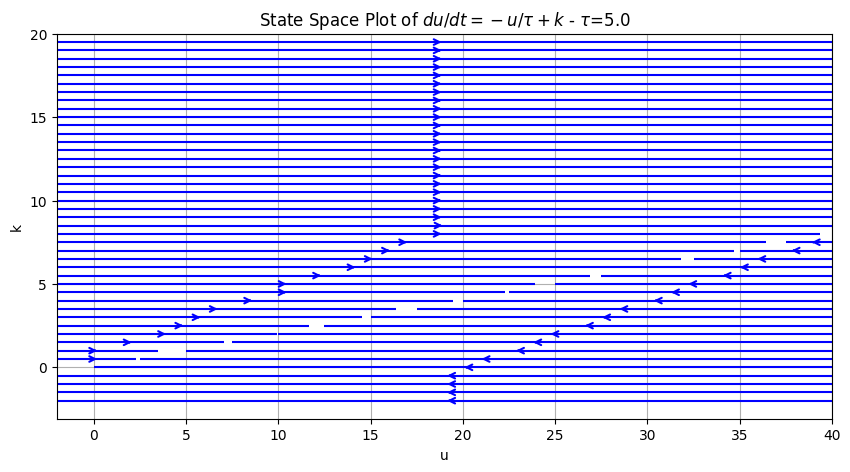

In [284]:
# Parameters
u_range = np.linspace(-2, 40, 40)
k_range = np.linspace(-2, 20, 30)

# Create a grid of u and k values
U, K = np.meshgrid(u_range, k_range)

# Time constant
tau = 5.0

# Define the ODE
dU_dt = -U/tau + K

# Plot
plt.figure(figsize=(10, 5))
plt.streamplot(U, K, dU_dt, np.zeros_like(dU_dt), density=1.5, arrowstyle='->', color='blue')
plt.xlabel('u')
plt.ylabel('k')
plt.title(f"State Space Plot of $du/dt = -u/\\tau + k$ - $\\tau$={tau}")
plt.grid(True)
plt.show()

#### Oscillatory

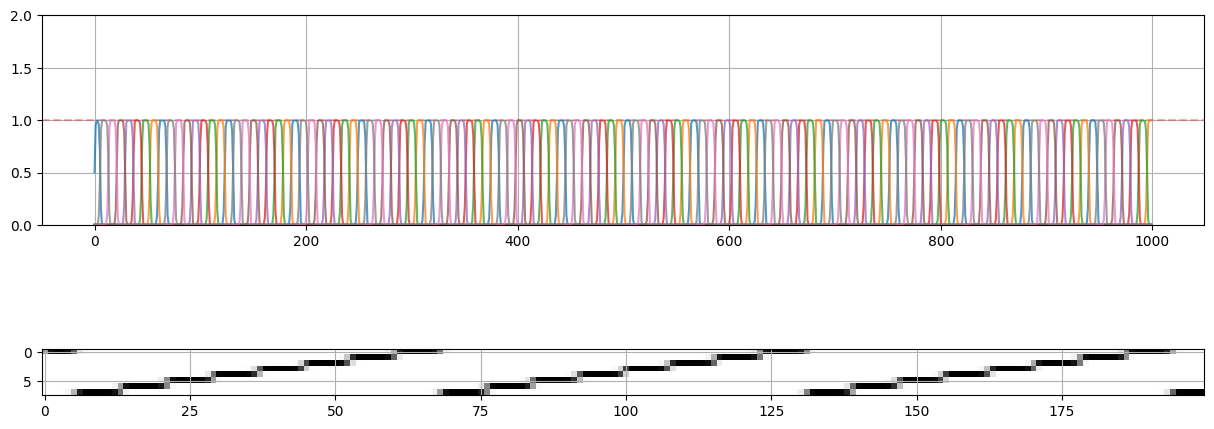

In [8]:
T = 1000
dt = 0.1
N = 8
tuning = np.linspace(0, 2*np.pi, N, endpoint=False).reshape(-1, 1)

thr = 1.
u = np.ones((N, 1))*1e-8
tau_0 = 30.
tau = tau_0
curr = np.zeros((N+1, 1))

record = np.zeros((T, N))
for t in range(T):

    u += (-u)/tau + np.exp(-(np.cos(t*dt + tuning) - 1)**2/0.01)

    # activation
    u = 1 / (1 + np.exp(-6*(u - thr)))

    # adaptive threshold
    #tau += (1*u + tau_0*(1-u) - tau) / 2
    
    # record
    record[t, :] = u.flatten()

plt.figure(figsize=(15, 6))
plt.subplot(211)
plt.axhline(thr, linestyle='--', color='red', alpha=0.3)
for i in range(N):
    plt.plot(range(T), record[:, i], alpha=0.75)

plt.grid()
plt.ylim((0, 2))

plt.subplot(212)
plt.imshow(record[:200].T, cmap='Greys')
plt.grid()
plt.show()


#### + Lateral inhibition

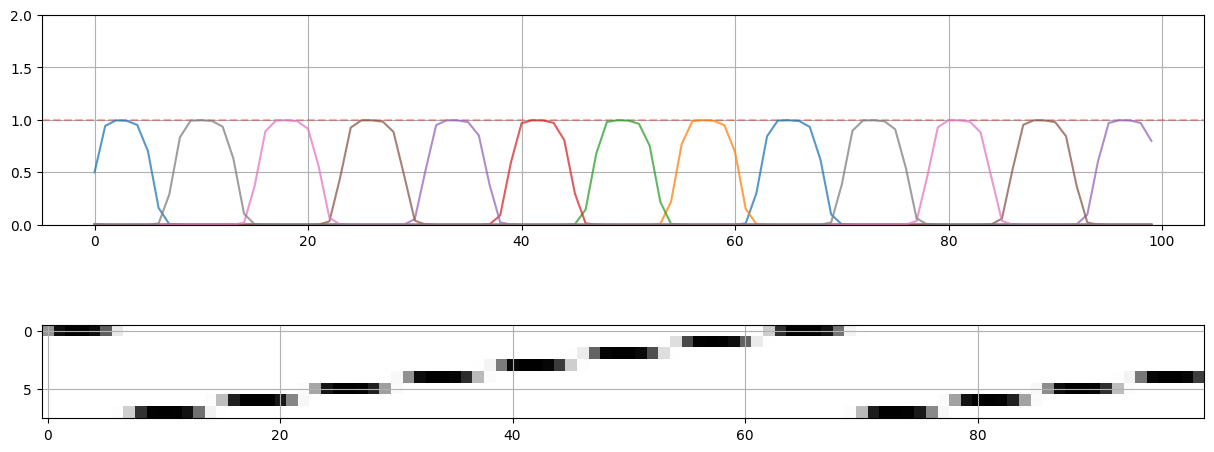

In [69]:
T = 100
dt = 0.1
N = 8
tuning = np.linspace(0, 2*np.pi, N, endpoint=False).reshape(-1, 1)

thr = 1.
u = np.ones((N, 1))*1e-8
tau_0 = 30.
tau = tau_0
curr = np.zeros((N+1, 1))

# lateral
Wr = -1  * (np.ones((N, N)) - np.eye(N))

record = np.zeros((T, N))
for t in range(T):

    u += (-u)/tau + np.exp(-(np.cos(t*dt + tuning) - 1)**2/0.01) + Wr @ u

    # activation
    u = 1 / (1 + np.exp(-6*(u - thr)))

    # adaptive threshold
    #tau += (1*u + tau_0*(1-u) - tau) / 2
    
    # record
    record[t, :] = u.flatten()

plt.figure(figsize=(15, 6))
plt.subplot(211)
plt.axhline(thr, linestyle='--', color='red', alpha=0.3)
for i in range(N):
    plt.plot(range(T), record[:, i], alpha=0.75)

plt.grid()
plt.ylim((0, 2))

plt.subplot(212)
plt.imshow(record[:200].T, cmap='Greys')
plt.grid()
plt.show()


## Plasticity

#### Only plasticity

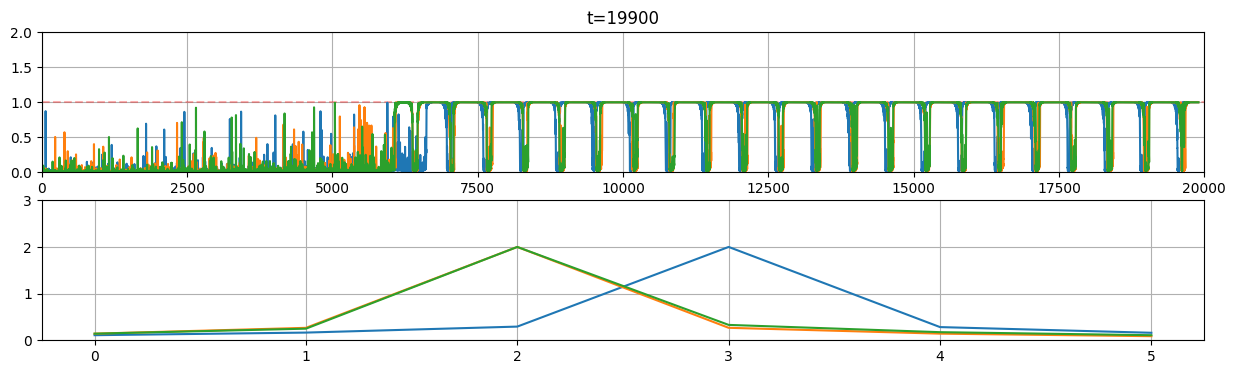

In [59]:
N = 3
T = len(X)

# neural settings
thr = 1.
u = np.ones((N, 1))*1e-8
W = np.ones((N, Nj))*1e-3
tau = 30.
lr = 0.01

# plasticity
rule = 'hebb'
beta = 10

# record
record = np.zeros((T, N))

for t, x in enumerate(X):
        
    u += (-u)/tau + W @ x.reshape(-1, 1) + np.random.normal(0, 0.3, size=(N, 1))**2
    
    # activation
    u = 1 / (1 + np.exp(-6*(u - thr)))

    # plasticity
    if rule == 'hebb':
        dw = u * x
    elif rule == 'oja':
        dw = u * x - W @ (x * x)

    W += lr * dw * (np.exp(beta*W)/np.exp(beta*W).sum(axis=1, keepdims=True))

    W = W.clip(1e-3, 2e0)

    # record
    record[t] = u.flatten()

    if t % 100 == 0:
        clf()
        plt.figure(figsize=(15, 4))
        plt.subplot(211)
        plt.axhline(thr, linestyle='--', color='red', alpha=0.3)
        for i in range(N):
            plt.plot(range(t), record[:t, i])
        plt.ylim((0, 2))
        plt.xlim((0, T))
        plt.grid()
        plt.title(f"{t=}")
        
        plt.subplot(212)
        #plt.imshow(W, cmap='plasma')
        for i in range(N):
            plt.plot(range(Nj), W[i])

        plt.ylim((0, 3))
        plt.grid()
        plt.pause(0.0001)

#### Plasticity + oscillatory local input

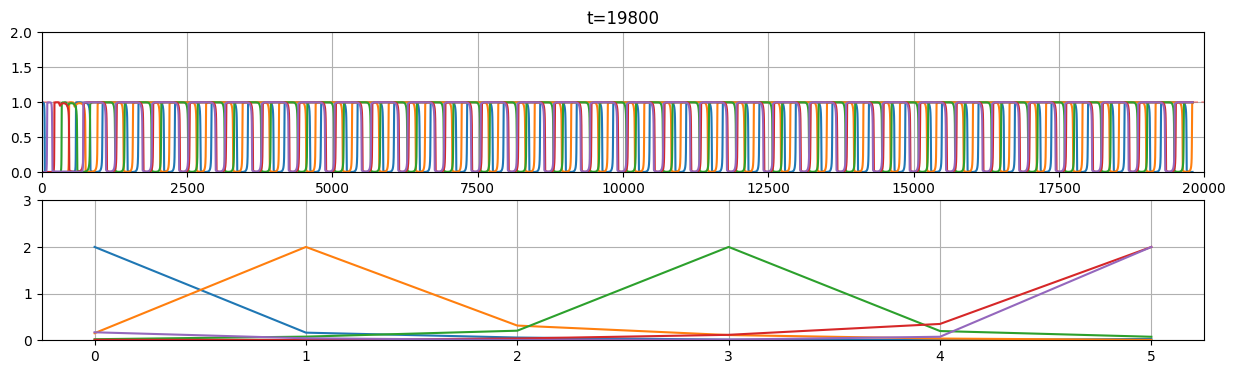

In [60]:
N = 5
T = len(X)

# neural settings
thr = 1.
u = np.ones((N, 1))*1e-8
W = np.ones((N, Nj))*1e-3
tau = 30.
lr = 0.01

# tuning
tuning = np.linspace(0, 2*np.pi, N, endpoint=False).reshape(-1, 1)

# plasticity
rule = 'hebb'
beta = 10

# record
record = np.zeros((T, N))

for t, x in enumerate(X):
        
    u += (-u)/tau + W @ x.reshape(-1, 1) + np.exp(-(np.cos(t*0.01 + tuning) - 1)**2/0.01)
    
    # activation
    u = 1 / (1 + np.exp(-6*(u - thr)))

    # plasticity
    if rule == 'hebb':
        dw = u * x
    elif rule == 'oja':
        dw = u * x - W @ (x * x)

    W += lr * dw * (np.exp(beta*W)/np.exp(beta*W).sum(axis=1, keepdims=True))

    W = W.clip(1e-3, 2e0)

    # record
    record[t] = u.flatten()

    if t % 200 == 0:
        clf()
        plt.figure(figsize=(15, 4))
        plt.subplot(211)
        plt.axhline(thr, linestyle='--', color='red', alpha=0.3)
        for i in range(N):
            plt.plot(range(t), record[:t, i])
        plt.ylim((0, 2))
        plt.xlim((0, T))
        plt.grid()
        plt.title(f"{t=}")
        
        plt.subplot(212)
        #plt.imshow(W, cmap='plasma')
        for i in range(N):
            plt.plot(range(Nj), W[i])

        plt.ylim((0, 3))
        plt.grid()
        plt.pause(0.0001)

#### Lateral inhibition

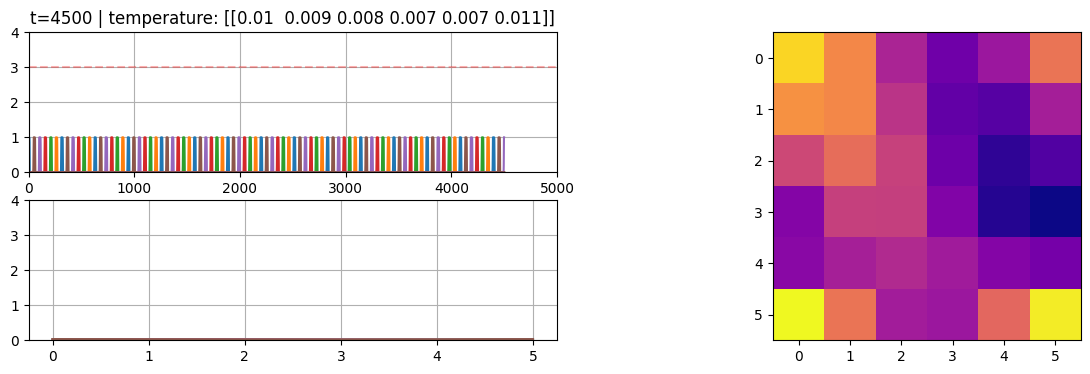

In [211]:
N = 6
T = len(X)

# neural settings
thr = 3.
u = np.ones((N, 1))*1e-8
W = np.ones((N, Nj))*1e-3
wmax = 3
tau_0 = 20.
tau = tau_0
lr = 0.01

# tuning
tuning_0 = np.linspace(0, 2*np.pi, N, endpoint=False).reshape(-1, 1)
tuning = tuning_0.copy()

# plasticity
rule = 'hebb'
beta = 10
temp = np.zeros((N, 1))

# lateral inhibition
Wr = -1 * (np.ones((N, N)) - np.eye(N))

# record
record = np.zeros((T, N))

for t, x in enumerate(X):
        
    u += (-u)/tau + W @ x.reshape(-1, 1) + thr * (1 - temp) * np.exp(
        - (np.cos(t*0.02 + tuning) - 1)**2/0.001) + Wr @ u #+ np.random.normal(0, 0.2, (N, 1))**2
    
    # activation
    u = 1 / (1 + np.exp(-7*(u - thr)))

    # time constant
    #tau += (1*u + tau_0*(1-u) - tau) / 2

    # temperature
    temp = (W.max(axis=1) / wmax).reshape(-1, 1)

    # weight decay
    W += (- W / 500) * (1 - temp)

    # plasticity
    if rule == 'hebb':
        dw = u * x
    elif rule == 'oja':
        dw = u * x - W @ (x * x)

    W += lr * dw * (np.exp(beta*W)/np.exp(beta*W).sum(axis=1, keepdims=True))

    W = W.clip(0., wmax)

    # record
    record[t] = u.flatten()

    if t % 500 == 0:
        clf()
        plt.figure(figsize=(15, 4))
        plt.subplot(221)
        plt.axhline(thr, linestyle='--', color='red', alpha=0.3)
        for i in range(N):
            plt.plot(range(t), record[:t, i])
        plt.ylim((0, thr+1))
        plt.xlim((0, T))
        plt.grid()
        plt.title(f"{t=} | temperature: {np.around(temp.T, 3)}")
        
        plt.subplot(223)
        #plt.imshow(W, cmap='plasma')
        for i in range(N):
            plt.plot(range(Nj), W[i])

        plt.ylim((0, wmax+1))
        plt.grid()

        plt.subplot(122)
        plt.imshow(W, cmap='plasma')
        plt.pause(0.0001)

## Simulation II

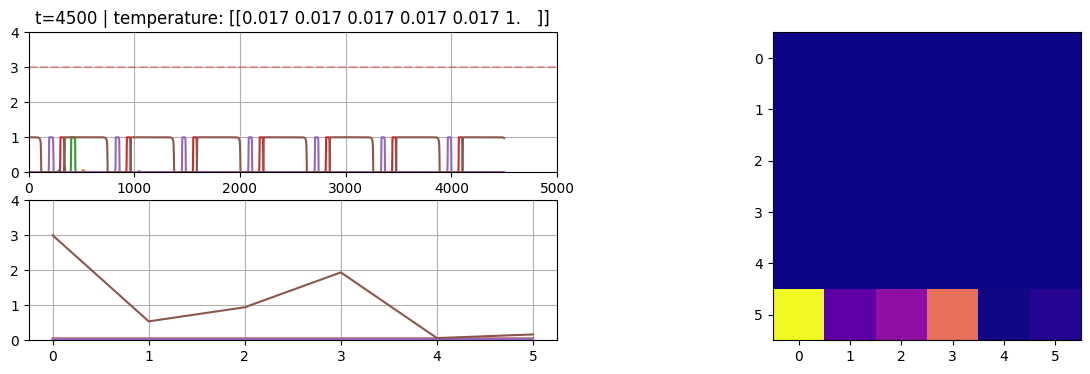

In [271]:
N = 6
T = len(X)

model = mm.RateNetwork3(N=N, Nj=Nj)

# record
record = np.zeros((T, N))

for t, x in enumerate(X):
        
    model.step(x=x.reshape(-1, 1))

    # record
    record[t] = model.u.flatten()

    if t % 500 == 0:
        clf()
        plt.figure(figsize=(15, 4))
        plt.subplot(221)
        plt.axhline(model._bias, linestyle='--', color='red', alpha=0.3)
        for i in range(N):
            plt.plot(range(t), record[:t, i])
        plt.ylim((0, thr+1))
        plt.xlim((0, T))
        plt.grid()
        plt.title(f"{t=} | temperature: {np.around(model.temp.T, 3)}")
        
        plt.subplot(223)
        #plt.imshow(W, cmap='plasma')
        for i in range(N):
            plt.plot(range(Nj), model.Wff[i])

        plt.ylim((0, model._wff_max+1))
        plt.grid()

        plt.subplot(122)
        plt.imshow(model.Wff, cmap='plasma')
        plt.pause(0.0001)

**Load individual**

In [43]:
genome = me.load_best_individual()
logger.info(f"Genome:\n{genome}")
model = mm.RateNetwork3(**genome)
logger.info(model)

2023-11-23 23:36:48 | Available files in /Users/daniekru/Research/lab/PCNN/cache:
2023-11-23 23:36:48 | 0: best_2239_r3.json
2023-11-23 23:36:48 | 1: best_2220_r3.json
2023-11-23 23:36:48 | 2: best_2311_1657_r3.json
2023-11-23 23:36:48 | 3: best_2238_r3.json
2023-11-23 23:36:48 | 4: best_2233_r3.json
2023-11-23 23:36:48 | 5: best_2215_r3.json
2023-11-23 23:36:48 | 6: best_ind_2238.json
2023-11-23 23:36:48 | 7: best_2342_r3.json
2023-11-23 23:36:48 | 8: best_ind_2311.json
2023-11-23 23:36:48 | 9: top_ij_1.json
2023-11-23 23:36:48 | 10: best_2227_r3.json
2023-11-23 23:36:48 | 11: best_2218_r3.json
2023-11-23 23:36:48 | 12: best_2149_r3.json
2023-11-23 23:36:48 | 13: best_2226_r3.json
2023-11-23 23:36:48 | 14: best_2132_r3.json
2023-11-23 23:36:48 | 15: best_2311_1731_r3.json
2023-11-23 23:36:48 | 16: best_2129_r3.json
2023-11-23 23:36:48 | 17: best_2224_r3.json
2023-11-23 23:36:48 | 18: best_2213_r3.json


Choose a file:  0


2023-11-23 23:36:58 | Best individual loaded from best_2239_r3.json in /Users/daniekru/Research/lab/PCNN/cache.
2023-11-23 23:36:58 | Genome:
{'gain': 2.0, 'bias': 3.4, 'lr': 0.64664, 'tau': 50.0, 'wff_std': 0.001, 'wff_min': 0.0, 'wff_max': 3.0, 'wff_tau': 13, 'rule': 'hebb', 'std_tuning': 0.001, 'soft_beta': 99.8, 'dt': 0.053, 'N': 6, 'Nj': 6}
2023-11-23 23:36:58 | RateNetwork3(N=6, Nj=6, rule=hebb) [fAckm]


**Tweak the model**

In [36]:
genome['N'] = 15

model = mm.RateNetwork3(**genome)
logger.info(model)

2023-11-23 17:33:03 | RateNetwork3(N=15, Nj=6, rule=hebb) [J6JD1]


**Settings**

In [1]:
dir(layer)

NameError: name 'layer' is not defined

In [5]:
N = model.N
Nj = model.Nj

# data
layer = it.InputLayer(N=Nj, kind='hd', sigma=1, max_rate=1)
logger.info(layer)

# input
X = layer.parse_trajectory(np.arange(0, 50, 0.01))
T = len(X)

# plot
plot_x(X)

2023-11-29 12:52:31 | InputLayer(N=6, kind=hd, sigma=1)


NameError: name 'plot_x' is not defined

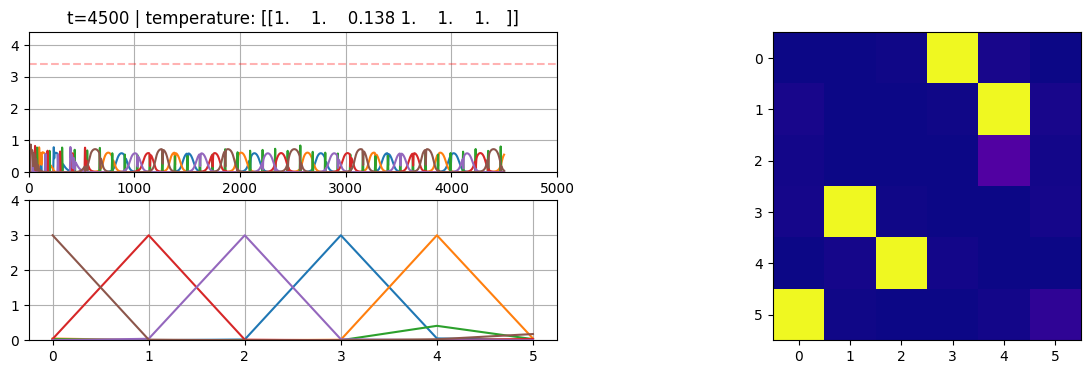

In [48]:
model.reset()

# record
record = np.zeros((T, N))

for t, x in enumerate(X):
        
    model.step(x=x.reshape(-1, 1))

    # record
    record[t] = model.u.flatten()

    if t % 500 == 0:
        clf()
        plt.figure(figsize=(15, 4))
        plt.subplot(221)
        plt.axhline(model._bias, linestyle='--', color='red', alpha=0.3)
        for i in range(N):
            plt.plot(range(t), record[:t, i])
        plt.ylim((0, model._bias+1))
        plt.xlim((0, T))
        plt.grid()
        plt.title(f"{t=} | temperature: {np.around(model.temp.T, 3)}")
        
        plt.subplot(223)
        #plt.imshow(W, cmap='plasma')
        for i in range(N):
            plt.plot(range(Nj), model.Wff[i])

        plt.ylim((0, model._wff_max+1))
        plt.grid()

        plt.subplot(122)
        plt.imshow(model.Wff, cmap='plasma')
        plt.pause(0.0001)

---

In [287]:
phi = np.array([[1, 1], [2, 2]])[0]
r = np.array([[1, 1]])[0]
print('phi:\n', phi)
print('\nr\n', r)

rphi = r - phi
print('\nr - phi\n', rphi)
print('\nR\n', R)
print('\nk\n', k_vectors[0])
rk = np.dot(R, k_vectors[0])
print('\nR @ k\n', rk)

rkphi = np.cos( f * (rk @ rphi))
print('\ncos(f * ((R @ k) @ (r - phi)))\n', rkphi)

rKphi = [np.cos( f * (np.dot(R, k) @ rphi)) for k in k_vectors]
print('\ncos(f * ((R @ k) @ (r - phi))) for k\n', rKphi)

srk = 1/3 + (2/9) * sum(rKphi)
print('\nsum(srk)\n', srk)

phi:
 [1 1]

r
 [1 1]

r - phi
 [0 0]

R
 [[ 0.5       -0.8660254]
 [ 0.8660254  0.5      ]]

k
 [1. 0.]

R @ k
 [0.5       0.8660254]

cos(f * ((R @ k) @ (r - phi)))
 1.0

cos(f * ((R @ k) @ (r - phi))) for k
 [1.0, 1.0, 1.0]

sum(srk)
 1.0


In [324]:
phi = np.array([[1, 1], [2, 2]]).T
r = np.array([[1, 1], [3, 3]]).T
print('phi:\n', phi)
print('\nr\n', r)

rphi = r - phi
print('\nr - phi\n', rphi)
print('\nR\n', R)
print('\nk\n', k_vectors[0])
rk = np.dot(R, k_vectors[0])
print('\nR @ k\n', rk)

rkphi = np.cos( f * (rk @ rphi))
print('\ncos(f * ((R @ k) @ (r - phi)))\n', rkphi)


rKphi = [np.cos( f * (np.dot(R, k) @ rphi)).tolist() for k in k_vectors]
print('\ncos(f * ((R @ k) @ (r - phi))) for k\n', rKphi)

srk = 1/3 + (2/9) * np.sum(rKphi, axis=0)
print('\nsum(srk)\n', srk)

srka = 1/3 + (2/9) * np.sum([np.cos( f * (np.dot(R, k) @ (r - phi))).tolist() for k in k_vectors], axis=0)

print(srka)

phi:
 [[1 2]
 [1 2]]

r
 [[1 3]
 [1 3]]

r - phi
 [[0 1]
 [0 1]]

R
 [[ 0.5       -0.8660254]
 [ 0.8660254  0.5      ]]

k
 [1. 0.]

R @ k
 [0.5       0.8660254]

cos(f * ((R @ k) @ (r - phi)))
 [1.         0.97716921]

cos(f * ((R @ k) @ (r - phi))) for k
 [[1.0, 0.9771692121267225], [1.0, -0.2662553420414173], [1.0, -0.055383342437132325]]

sum(srk)
 [1.         0.47900678]
[1.         0.47900678]


In [266]:
rkphi = np.cos( f * (rk @ rphi))
print('cos(f * ((R @ k) @ (r - phi)))\n\n', rkphi)

cos(f * ((R @ k) @ (r - phi)))

 [-0.76092626 -0.76092626]


In [225]:
rKphi = [np.cos( f * (np.dot(R, k) @ rphi)) for k in k_vectors]
print('cos(f * ((R @ k) @ (r - phi))) for k\n\n', rKphi)

cos(f * ((R @ k) @ (r - phi))) for k

 [0.9754272900395919, 0.9029167963079644, 0.9754272900395919]


In [181]:
r = np.random.randint(0, 10, size=(2, 1))/10
list((np.dot(R, k) @ (r - phi)) for k in k_vectors)

[array([0.33660254]), array([-0.5]), array([0.16339746])]

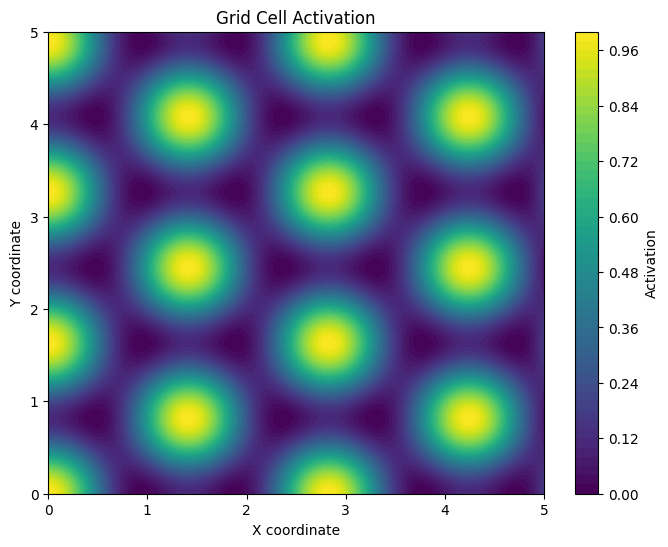

In [149]:
# Generate a grid of points
x = np.linspace(0, 5, 100)
y = np.linspace(0, 5, 100)
X, Y = np.meshgrid(x, y)

# Define the rotation matrix for 60 degrees
theta = np.radians(60)
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta),  np.cos(theta)]])

# Define the wave vectors k_j
k_vectors = np.array([[1, 0],
                      [np.cos(np.radians(120)), np.sin(np.radians(120))],
                      [np.cos(np.radians(240)), np.sin(np.radians(240))]])

# Frequency factor
f = 2 * np.pi * 1 / np.sqrt(2)

# Choose a phase phi
phi = np.array([0, 0])

# Adjusting the grid cell activation function to properly handle the broadcasting of the phi parameter
def grid_cell_activation(x, y, phi_x, phi_y):
    r = np.array([x, y])
    phi = np.array([phi_x, phi_y])
    activation = 1/3 + (2/9) * sum(np.cos(f * np.dot(R, k) @ (r - phi)) for k in k_vectors)
    return activation

# Choose a phase phi
phi_x, phi_y = 0, 0

# Compute the activation at each point, passing phi_x and phi_y separately
activation = np.vectorize(grid_cell_activation)(X, Y, phi_x, phi_y)

# Plot the activation
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, activation, levels=50, cmap='viridis')
plt.colorbar(label='Activation')
plt.title('Grid Cell Activation')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.show()


In [141]:
net = Net(phi=np.array([[0, 1], [0, 1]]))

# Compute the activation at each point, passing phi_x and phi_y separately
net._step(np.array([0., 1]))

array([1., 1.])

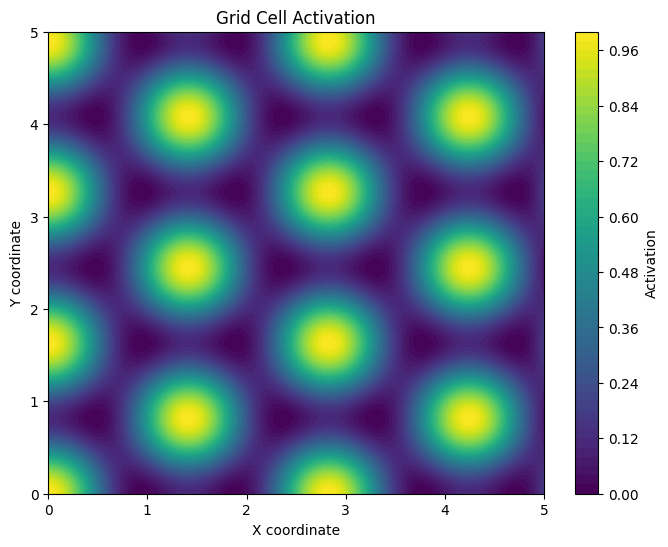

In [329]:
class Net:

    def __init__(self, phi: np.ndarray):

        # Define the rotation matrix for 60 degrees
        theta = np.radians(60)
        self.R = np.array([[np.cos(theta), -np.sin(theta)],
                           [np.sin(theta),  np.cos(theta)]])
        
        # Define the wave vectors k_j
        self.k_vectors = np.array([[1, 0],
                              [np.cos(2*theta), np.sin(2*theta)],
                              [np.cos(4*theta), np.sin(4*theta)]])
        
        # Frequency factor
        self.f = 2 * np.pi * 1 / np.sqrt(2)

        # phase
        self.phi = phi

        # step
        self.step_vect = np.vectorize(self._step_vect, excluded='self')

    def step(self, x):
        
        return 1/3 + (2/9) * np.sum([np.cos(self.f * (np.dot(self.R, k) @ (x - self.phi))).tolist() for k in self.k_vectors], axis=0)

    def _step_vect(self, X, Y):

        return self.step(x=np.array([X, Y]))

# Generate a grid of points
x = np.linspace(0, 5, 100)
y = np.linspace(0, 5, 100)
X, Y = np.meshgrid(x, y)

# instance
net = Net(phi=np.array([0, 0]))

# Compute the activation at each point, passing phi_x and phi_y separately
activation = net.step_vect(X, Y)

# Plot the activation
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, activation, levels=50, cmap='viridis')
plt.colorbar(label='Activation')
plt.title('Grid Cell Activation')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.show()


In [318]:
net = Net(phi=np.array([[0, 0], [2, 2]]).T)
net._step(x=np.array([[0, 0], [1, 1]]))

array([0.00496554, 0.23266337])

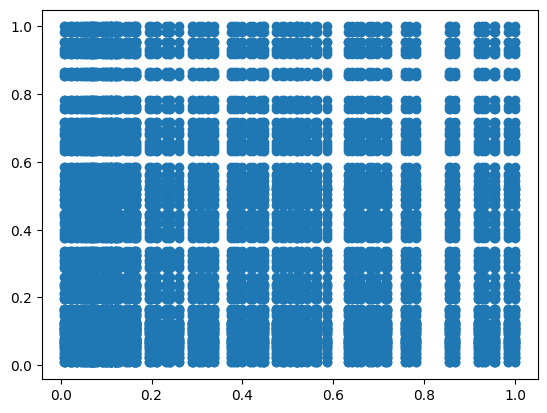

In [102]:
plt.scatter(activation[:, 0], activation[:, 1]);

In [86]:
from sklearn.utils.extmath import cartesian


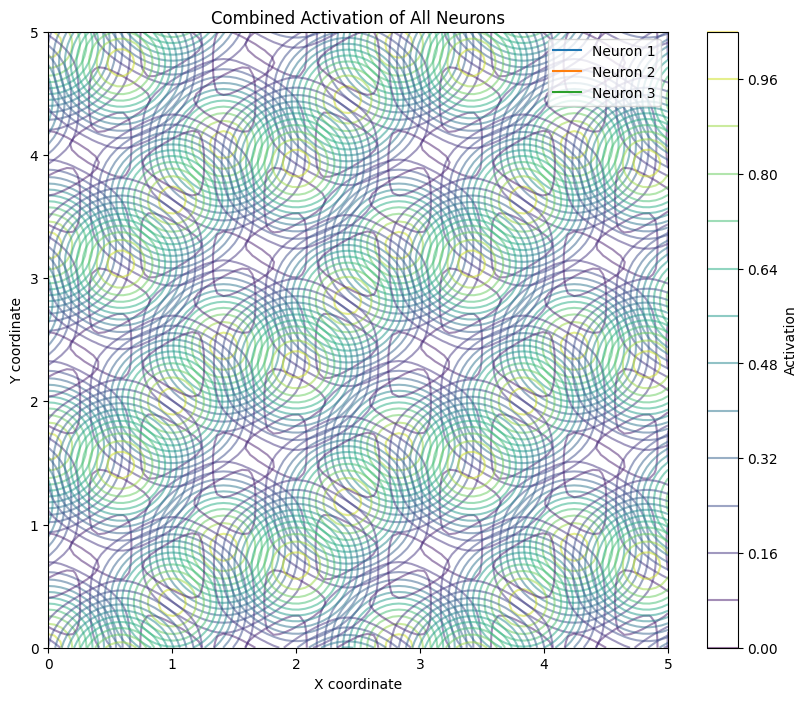

In [472]:
# Rewriting the Net class with fully vectorized operations

# Adjusting the Net class to handle vectorization correctly

class Net:

    def __init__(self, phi: np.ndarray):
        # Define the rotation matrix for 60 degrees
        theta = np.radians(60)
        self.R = np.array([[np.cos(theta), -np.sin(theta)],
                           [np.sin(theta),  np.cos(theta)]])

        # Define the wave vectors k_j
        self.k_vectors = np.array([[1, 0],
                                  [np.cos(2*theta), np.sin(2*theta)],
                                  [np.cos(4*theta), np.sin(4*theta)]])

        # Frequency factor
        self.f = 2 * np.pi * 1 / np.sqrt(2)

        # Phases for each neuron
        self.phis = phi

    def step(self, x):
        # Reshape x for broadcasting
        x = x.reshape(-1, 2)  # Reshape x to (-1, 2)
        
        # Compute the dot product of the rotation matrix with k_vectors
        # Resulting shape will be (3, 2)
        rotated_k = np.dot(self.k_vectors, self.R.T)

        # Initialize activation array
        activations = np.zeros((x.shape[0], self.phis.shape[0]))

        # Compute activations for all neurons
        for i, phi in enumerate(self.phis):
            # Compute the differences (x - phi) for all points
            differences = x - phi

            # Compute the dot products for all points and k_vectors
            dot_products = np.dot(differences, rotated_k.T)

            # Compute the cosine terms and sum along the k_vector axis
            activations[:, i] = 1/3 + (2/9) * np.sum(np.cos(self.f * dot_products), axis=1)

        return activations

    def step_vect(self, X, Y):
        # Prepare the grid points
        grid_points = np.dstack([X, Y])

        # Compute activations for all grid points
        return self.step(grid_points)

# Generate a grid of points
x = np.linspace(0, 5, 100)
y = np.linspace(0, 5, 100)
X, Y = np.meshgrid(x, y)

# Instance with multiple neuron phases
phi = np.array([[0, 0], [1, 2], [2, 2.3]])
net = Net(phi=phi)

# Compute the activation at each point
activation = net.step_vect(X, Y)

# Correcting the plotting code to handle the 2D structure of the activation array

# Plot the combined activations of all neurons
plt.figure(figsize=(10, 8))

# Loop through each neuron and plot its activation
for i in range(activation.shape[1]):
    plt.contour(X, Y, activation.reshape(X.shape[0], Y.shape[1], -1)[:, :, i], levels=15, cmap='viridis', alpha=0.5, linewidths=1.5)

# Add labels and title
plt.title('Combined Activation of All Neurons')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.colorbar(label='Activation')

# Add a legend to distinguish different neurons
for i in range(activation.shape[1]):
    plt.plot([], [], label=f'Neuron {i+1}')

plt.legend()
plt.show()



In [476]:
activation.reshape(X.shape[0], Y.shape[1], -1)[:, :, i]

array([[0.24191319, 0.31169602, 0.38778207, ..., 0.1763667 , 0.16465223,
        0.14788984],
       [0.22761346, 0.29169029, 0.3623219 , ..., 0.22941506, 0.21642839,
        0.19774275],
       [0.2101142 , 0.26720834, 0.3311651 , ..., 0.29433287, 0.27978934,
        0.25875012],
       ...,
       [0.24191061, 0.31169241, 0.38777747, ..., 0.17637627, 0.16466157,
        0.14789883],
       [0.22761016, 0.29168568, 0.36231603, ..., 0.2294273 , 0.21644033,
        0.19775425],
       [0.2101103 , 0.26720289, 0.33115816, ..., 0.29434732, 0.27980344,
        0.2587637 ]])

In [354]:
print(r)
print(phi)
r - phi.reshape(-1, 1, 2)

[[1 1]
 [3 3]]
[[0.  0. ]
 [1.  2. ]
 [2.  2.3]]


array([[[ 1. ,  1. ],
        [ 3. ,  3. ]],

       [[ 0. , -1. ],
        [ 2. ,  1. ]],

       [[-1. , -1.3],
        [ 1. ,  0.7]]])

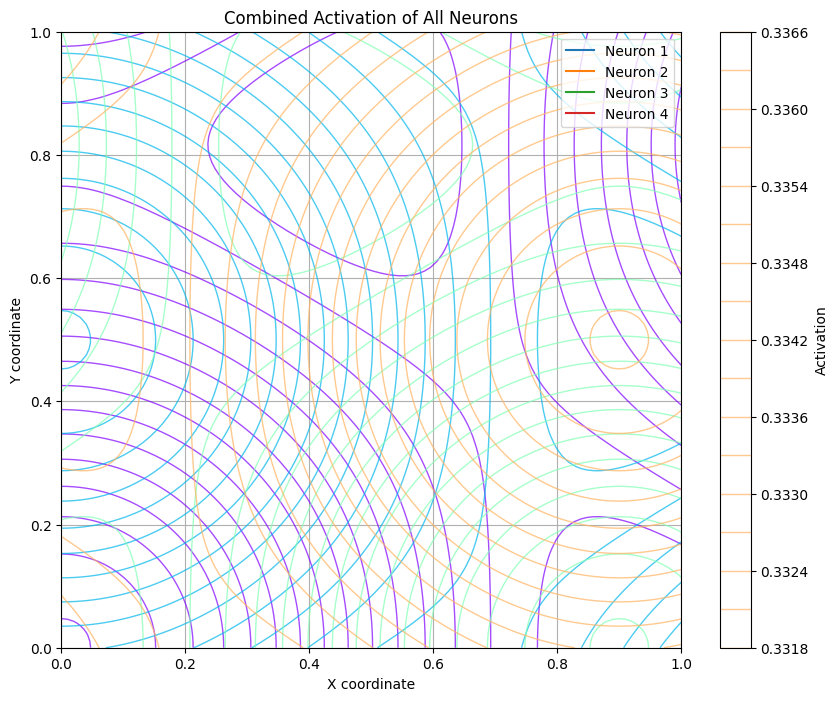

In [620]:
### Rewriting the Net class with fully vectorized operations

# Adjusting the Net class to handle vectorization correctly

class Net:

    def __init__(self, phi: np.ndarray):


        self.N = len(phi)
        
        # Define the rotation matrix for 60 degrees
        theta = np.radians(60)
        self.R = np.array([[np.cos(theta), -np.sin(theta)],
                           [np.sin(theta),  np.cos(theta)]])

        # Define the wave vectors k_j
        self.k_vectors = np.array([[1, 0],
                                  [np.cos(2*theta), np.sin(2*theta)],
                                  [np.cos(4*theta), np.sin(4*theta)]])

        # Frequency factor
        self.f = 2 * np.pi * 1 / np.sqrt(2)

        # Phases for each neuron
        self.phis = phi

    def step(self, x):
        
        
        return 1/3 + 0.001 * np.sum(np.cos(self.f * ((x.reshape(-1, 2) - phi.reshape(-1, 1, 2)) @ np.dot(self.k_vectors, self.R.T).T)), axis=2)

        #return activations#.reshape(-1, self.N)

    def step_vect(self, X, Y):
        
        # Prepare the grid points
        grid_points = np.dstack([X, Y])

        # Compute activations for all grid points
        return self.step(grid_points)

# Generate a grid of points
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)

# Instance with multiple neuron phases
#phi = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]) * np.array([0.7, 0.8])
#phi = np.array([[0, 0]])
n = 2
#phi = np.array(list(itproduct(list(range(n)), list(range(n))))) * np.array([0.7, 0.8])
phi = np.array(list(itproduct(list(range(n)), list(range(n))))) * np.array([0.9, 0.5])
net = Net(phi=phi)
n = len(phi)

# Compute the activation at each point
activation = net.step_vect(X, Y)

# Correcting the plotting code to handle the 2D structure of the activation array

#print('\n', activation, activation.shape, '\n\n')

# Plot the combined activations of all neurons
plt.figure(figsize=(10, 8))

# Generate a list of colormaps, one for each neuron
cmaps = [plt.cm.rainbow(i/n) for i in range(n)]

# Loop through each neuron and plot its activation
for i in range(n):
    # Reshape the activation of the ith neuron to match X and Y's shape
    Z = activation[i].reshape(X.shape)

    # Plot the contour for each neuron
    plt.contour(X, Y, Z, levels=15, colors=[cmaps[i]], alpha=0.7, linewidths=1.)

# Add labels and title
plt.title('Combined Activation of All Neurons')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.colorbar(label='Activation')

# Add a legend to distinguish different neurons
for i in range(activation.shape[0]):
   plt.plot([], [], label=f'Neuron {i+1}')

plt.legend()
plt.grid()
plt.show()



In [553]:
activation.shape

(9, 10000)

In [534]:
from itertools import product as itproduct

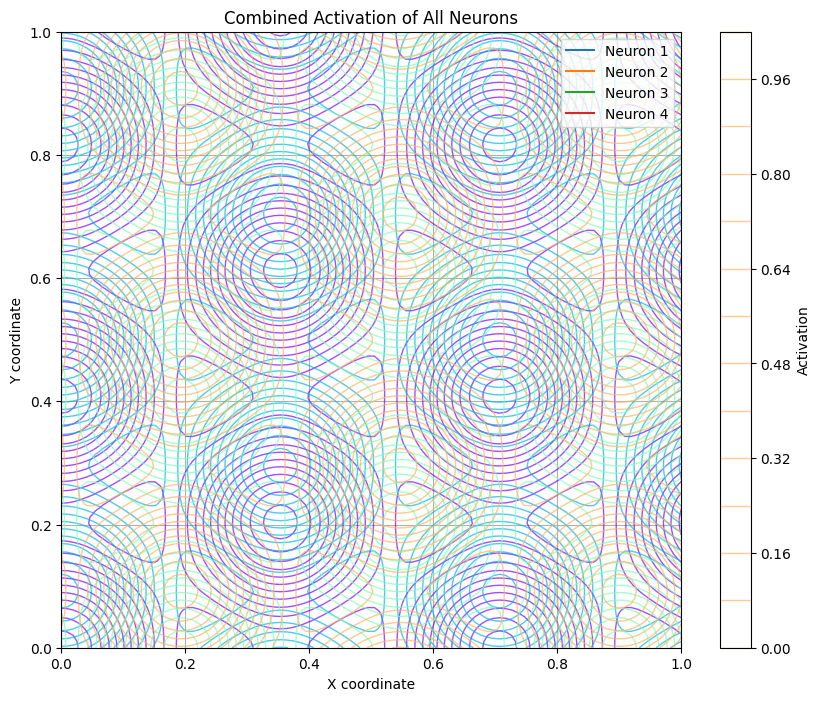

In [640]:
### Rewriting the Net class with fully vectorized operations

# Adjusting the Net class to handle vectorization correctly

class Net:

    def __init__(self, phi: np.ndarray):


        self.N = len(phi)
        
        # Define the rotation matrix for 60 degrees
        theta = np.radians(60)
        self.R = np.array([[np.cos(theta), -np.sin(theta)],
                           [np.sin(theta),  np.cos(theta)]])

        # Define the wave vectors k_j
        self.k_vectors = np.array([[1, 0],
                                  [np.cos(2*theta), np.sin(2*theta)],
                                  [np.cos(4*theta), np.sin(4*theta)]])

        # Frequency factor
        self.f = 2 * np.pi * 4 / np.sqrt(2)

        # Phases for each neuron
        self.phis = phi

    def step(self, x):
        
        
        return 1/3 + 2/9 * np.sum(np.cos(self.f * ((x.reshape(-1, 2) - phi.reshape(-1, 1, 2)) @ np.dot(self.k_vectors, self.R.T).T)), axis=2)

        #return activations#.reshape(-1, self.N)

    def step_vect(self, X, Y):
        
        # Prepare the grid points
        grid_points = np.dstack([X, Y])

        # Compute activations for all grid points
        return self.step(grid_points)

# Generate a grid of points
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)

# Instance with multiple neuron phases
#phi = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]) * np.array([0.7, 0.8])
#phi = np.array([[0, 0]])
n = 2
#phi = np.array(list(itproduct(list(range(n)), list(range(n))))) * np.array([0.7, 0.8])
phi = np.array(list(itproduct(list(range(n)), list(range(n))))) * np.array([0.9, 0.5])
net = Net(phi=phi)
n = len(phi)

# Compute the activation at each point
activation = net.step_vect(X, Y)

# Correcting the plotting code to handle the 2D structure of the activation array

#print('\n', activation, activation.shape, '\n\n')

# Plot the combined activations of all neurons
plt.figure(figsize=(10, 8))

# Generate a list of colormaps, one for each neuron
cmaps = [plt.cm.rainbow(i/n) for i in range(n)]

# Loop through each neuron and plot its activation
#plt.imshow(activation.sum(axis=0).reshape(100, 100), cmap='plasma')
# Generate a list of colormaps, one for each neuron

# Loop through each neuron and plot its activation
for i in range(n):
    # Reshape the activation of the ith neuron to match X and Y's shape
    Z = activation[i].reshape(X.shape)

    # Plot the contour for each neuron
    plt.contour(X, Y, Z, levels=15, colors=[cmaps[i]], alpha=0.7, linewidths=1.)

# Add labels and title
plt.title('Combined Activation of All Neurons')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.colorbar(label='Activation')

# Add a legend to distinguish different neurons
for i in range(activation.shape[0]):
   plt.plot([], [], label=f'Neuron {i+1}')

plt.legend()
plt.grid()
plt.show()

